In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

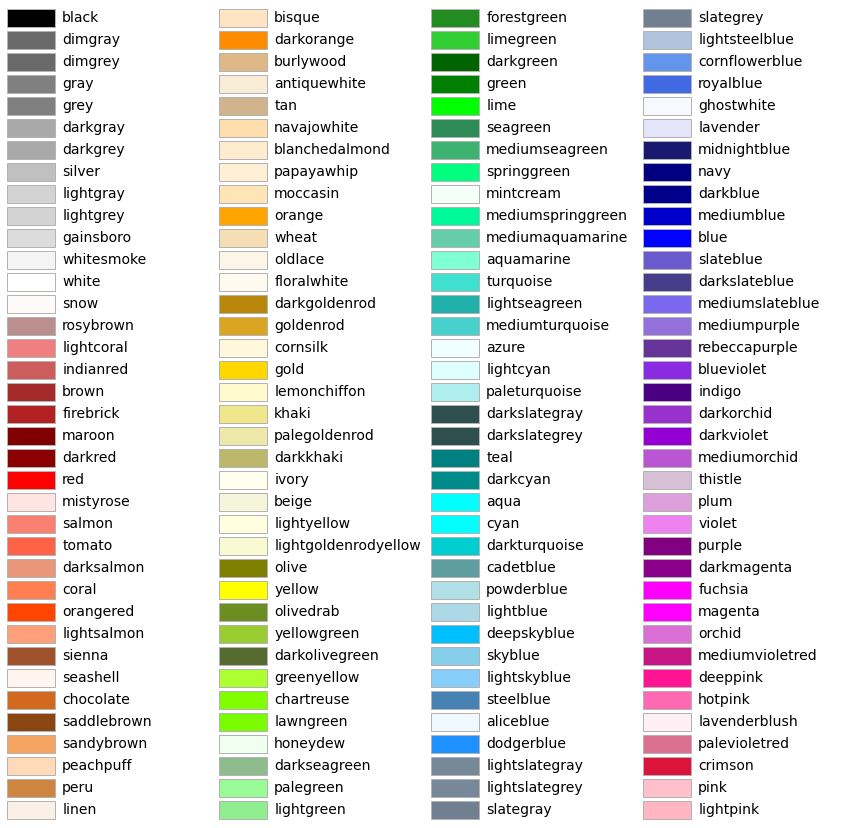

In [6]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [7]:
#read csv file
df = pd.read_csv('C:/Users/sigma/Desktop/manual_analysis_Denchmark.csv')
df

,Project,Bug/Issue ID,Summary,Commit ID,DL Bugs,DL Bug Type,Non DL bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,API,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,NaN,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,NaN,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,GPU,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,NaN,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,API,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,NaN,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,NaN,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,API,No,No,Yes


## Whole dataset for manual analysis

In [8]:
df['DL Bugs '] = df['DL Bugs '].str.strip()
df['Non DL bugs'] = df['Non DL bugs'].str.strip()
df['Extrinsic Bug'] = df['Extrinsic Bug'].str.strip()
df['Intrinsic Bug'] = df['Intrinsic Bug'].str.strip()

In [9]:
#replace the missing value or nan value with 0
df = df.fillna(420)

In [10]:
#change the name of few columns
df = df.rename(columns={'Bug/Issue ID': 'Bug_ID', 'DL Bugs ':'DL_Bugs','Non DL bugs':'Non_DL_Bugs', 'Extrinsic Bugs':'Extrinsic_Bugs', 'Intrinsic Bugs':'Intrinsic_Bugs'})
df

,Project,Bug_ID,Summary,Commit ID,DL_Bugs,DL Bug Type,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,API,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,GPU,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,API,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,420,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,420,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,API,No,No,Yes


In [11]:
#count the number of rows
total_bug= df.count() - 1

In [12]:
#create a list
list_label= ['DL_Bugs','Non_DL_Bugs','Extrinsic_Bugs','Intrinsic_Bugs']

In [13]:
#create a list for the count of the string values 'Yes' & 'No' in the columns
list_label_count = [df['Non_DL_Bugs'].value_counts()['No'],df['Non_DL_Bugs'].value_counts()['Yes'],df['Intrinsic Bug'].value_counts()['No'],df['Intrinsic Bug'].value_counts()['Yes']]

In [14]:
#get the ratio of DL_Bugs and Non_DL_Bugs
DL_Bugs_ratio = df['Non_DL_Bugs'].value_counts()['No']/total_bug['Non_DL_Bugs']
Non_DL_Bugs_ratio = df['Non_DL_Bugs'].value_counts()['Yes']/total_bug['Non_DL_Bugs']
Extrinsic_Bugs_ratio = df['Intrinsic Bug'].value_counts()['No']/total_bug['Intrinsic Bug']
Intrinsic_Bugs_ratio = df['Intrinsic Bug'].value_counts()['Yes']/total_bug['Intrinsic Bug']

In [15]:
#list of the ratio
list_ratio = [DL_Bugs_ratio,Non_DL_Bugs_ratio,Extrinsic_Bugs_ratio,Intrinsic_Bugs_ratio]
list_ratio

[0.6536458333333334, 0.3489583333333333, 0.4010416666666667, 0.6015625]

In [16]:
#list of the names of the unique values in the column
list_dl_bug_type_label = ['NDL Bug','Model','Training','Tensor & Input','API','GPU']

In [17]:
#replace the name of the DL Bug Type column
df = df.rename(columns={'DL Bug Type': 'DL_Bug_Type'})
#replace the name of the extrinsic bug column
df = df.rename(columns={'Extrinsic Bug': 'Extrinsic_Bugs'})
#replace the name of the intrinsic bug column
df = df.rename(columns={'Intrinsic Bug': 'Intrinsic_Bugs'})
df

,Project,Bug_ID,Summary,Commit ID,DL_Bugs,DL_Bug_Type,Non_DL_Bugs,Extrinsic_Bugs,Intrinsic_Bugs
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,API,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,GPU,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,API,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,420,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,420,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,API,No,No,Yes


In [18]:
#replace the column value of Dl_bug_type with Model = 1.0, training = 2.0, tensor & input = 3.0, API = 4.0, gpu = 5.0
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Model'],1.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Model '],1.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Training'],2.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Training '],2.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Tensor & Input'],3.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Tensor & Input '],3.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['Tensor'],3.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['API'],4.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['GPU'],5.0)
df['DL_Bug_Type'] = df['DL_Bug_Type'].replace(['GPU '],5.0)
df


,Project,Bug_ID,Summary,Commit ID,DL_Bugs,DL_Bug_Type,Non_DL_Bugs,Extrinsic_Bugs,Intrinsic_Bugs
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420.0,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420.0,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,5.0,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,4.0,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,420.0,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,420.0,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,4.0,No,No,Yes


In [19]:
#print the unique values of the column
df['DL_Bug_Type'].unique()

array([  4., 420.,   5.,   1.,   2.,   3.])

In [20]:
#create a list for the count of the string values 'Yes' & 'No' in the columns
list_dl_bug_type = [df['DL_Bug_Type'].value_counts()[420.0],df['DL_Bug_Type'].value_counts()[1.0],df['DL_Bug_Type'].value_counts()[2.0],df['DL_Bug_Type'].value_counts()[3.0],df['DL_Bug_Type'].value_counts()[4.0],df['DL_Bug_Type'].value_counts()[5.0]]

In [21]:
total_bug['DL_Bug_Type']= (total_bug['DL Bug Type']+1)

In [22]:
#get the ratio of dl_bug_type
Non_DL_Bug_ratio = df['DL_Bug_Type'].value_counts()[420.0]/total_bug['DL_Bug_Type']
Model_ratio = df['DL_Bug_Type'].value_counts()[1.0]/total_bug['DL_Bug_Type']
Training_ratio = df['DL_Bug_Type'].value_counts()[2.0]/total_bug['DL_Bug_Type']
Tensor_Input_ratio = df['DL_Bug_Type'].value_counts()[3.0]/total_bug['DL_Bug_Type']
API_ratio = df['DL_Bug_Type'].value_counts()[4.0]/total_bug['DL_Bug_Type']
GPU_ratio = df['DL_Bug_Type'].value_counts()[5.0]/total_bug['DL_Bug_Type']

In [23]:
list_dl_bug_type_ratio = [Non_DL_Bug_ratio,Model_ratio,Training_ratio,Tensor_Input_ratio,API_ratio,GPU_ratio]

In [24]:
#percentage of the ratio
list_dl_bug_type_ratio = [i * 100 for i in list_dl_bug_type_ratio]
list_dl_bug_type_ratio

[35.064935064935064,
 13.246753246753245,
 27.27272727272727,
 5.714285714285714,
 14.285714285714285,
 4.415584415584416]

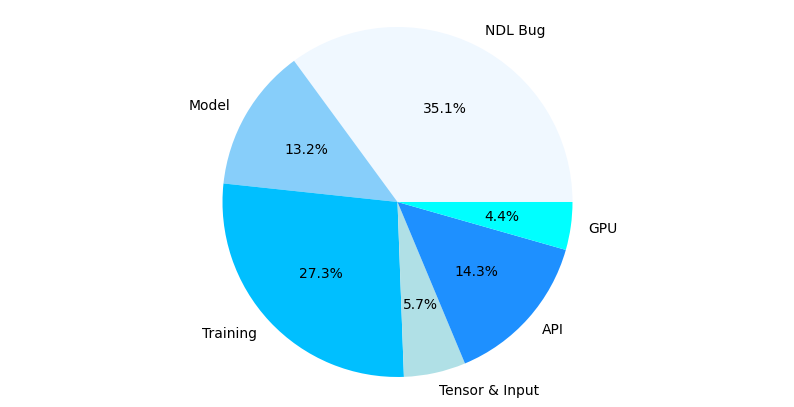

In [25]:
#visualize the data with the help of pie chart with customization of color and grid of the graph with clear font size
plt.figure(figsize=(10,5))
plt.pie(list_dl_bug_type,labels=list_dl_bug_type_label,autopct='%1.1f%%',colors=['aliceblue','lightskyblue','deepskyblue','powderblue','dodgerblue','aqua'])
plt.axis('equal')
plt.grid()
plt.show()

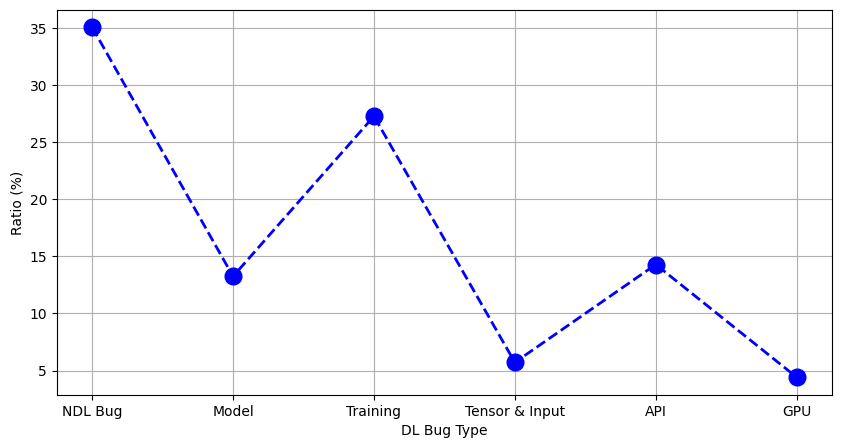

In [26]:
#visualize using line graph with customization of the graph
plt.figure(figsize=(10,5))
plt.plot(list_dl_bug_type_label,list_dl_bug_type_ratio,color='blue',marker='o',linestyle='dashed',linewidth=2,markersize=12)
plt.xlabel('DL Bug Type')
plt.ylabel('Ratio (%)')
plt.grid()
plt.show()

In [27]:
#copy the dataframe
df2 = df.copy()

In [28]:
#replace the yes to 1 and no to 0 for non_dl_bugs and extrinsic_bug columns
df2['Non_DL_Bugs'] = df2['Non_DL_Bugs'].replace({'Yes':1,'No':0})
df2['Extrinsic_Bugs'] = df2['Extrinsic_Bugs'].replace({'Yes':1,'No':0})
df2['DL_Bugs'] = df2['DL_Bugs'].replace({'Yes':1,'No':0})
df2['Intrinsic_Bugs'] = df2['Intrinsic_Bugs'].replace({'Yes':1,'No':0})

In [29]:
#correlation of Non_DL_Bugs and Extrinsic Bug columns from the dataframe
df2[['Non_DL_Bugs','Extrinsic_Bugs']].corr()

,Non_DL_Bugs,Extrinsic_Bugs
Non_DL_Bugs,1.000000,0.171406
Extrinsic_Bugs,0.171406,1.000000


In [30]:
#correlation of DL_Bugs and Extrinsic Bug columns from the dataframe
df2[['DL_Bugs','Extrinsic_Bugs']].corr()

,DL_Bugs,Extrinsic_Bugs
DL_Bugs,1.000000,-0.177778
Extrinsic_Bugs,-0.177778,1.000000


In [31]:
# correlation of DL bugs, non dl bugs, intrinsic bugs and extrinsic bugs
df2[['DL_Bugs','Non_DL_Bugs','Extrinsic_Bugs', 'Intrinsic_Bugs']].corr()

,DL_Bugs,Non_DL_Bugs,Extrinsic_Bugs,Intrinsic_Bugs
DL_Bugs,1.000000,-0.994303,-0.177778,0.177778
Non_DL_Bugs,-0.994303,1.000000,0.171406,-0.171406
Extrinsic_Bugs,-0.177778,0.171406,1.000000,-1.000000
Intrinsic_Bugs,0.177778,-0.171406,-1.000000,1.000000


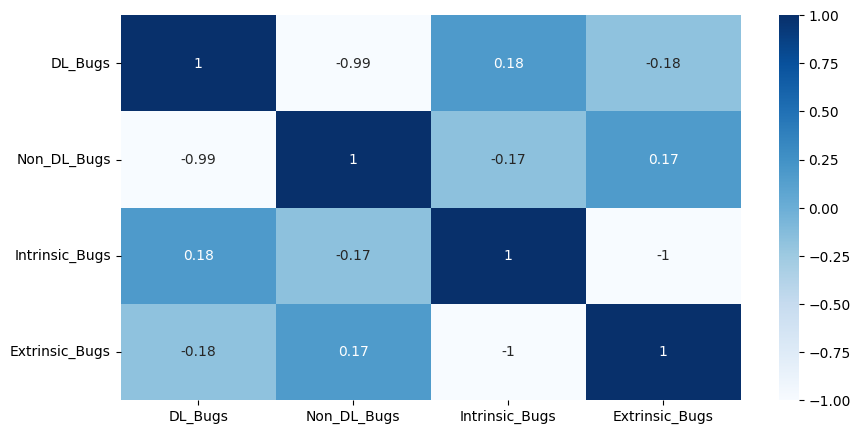

In [32]:
#visualize the correlation of DL bugs, non dl bugs, intrinsic bugs and extrinsic bugs
plt.figure(figsize=(10,5))
sns.heatmap(df2[['DL_Bugs','Non_DL_Bugs','Intrinsic_Bugs','Extrinsic_Bugs']].corr(),annot=True, cmap='Blues')
plt.show()

In [33]:
# create a list of DL_bug_type
Bug_Type = ['Model & Intrinsic', 'Model & Extrinsic', 'Training & Intrinsic', 'Training & Extrinsic', ' Tensor & Intrinsic', 'Tensor & Extrinsic', 'API & Intrinsic', 'API & Extrinsic', 'GPU & Intrinsic', 'GPU & Extrinsic', 'NDL & Intrinsic', 'NDL & Extrinsic']

In [34]:
#prinnt the ratio of each unique values from DL_bug_type column with extrinsic bug column
Model_Extrinsic = (df2[(df2['DL_Bug_Type']==1.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==1.0)].count()
Model_Intrinsic = (df2[(df2['DL_Bug_Type']==1.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==1.0)].count()
Training_Extrinsic = (df2[(df2['DL_Bug_Type']==2.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==2.0)].count()
Training_Intrinsic = (df2[(df2['DL_Bug_Type']==2.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==2.0)].count()
Tensor_Extrinsic = (df2[(df2['DL_Bug_Type']==3.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==3.0)].count()
Tensor_Intrinsic =  (df2[(df2['DL_Bug_Type']==3.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==3.0)].count()
API_Extrinsic =  (df2[(df2['DL_Bug_Type']==4.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==4.0)].count()
API_Intrinsic = (df2[(df2['DL_Bug_Type']==4.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==4.0)].count()
GPU_Extrinsic = (df2[(df2['DL_Bug_Type']==5.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==5.0)].count()
GPU_Intrinsic = (df2[(df2['DL_Bug_Type']==5.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==5.0)].count()
NDL_Extrinsic = (df2[(df2['DL_Bug_Type']==420.0) & (df2['Extrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==420.0)].count()
NDL_Intrinsic = (df2[(df2['DL_Bug_Type']==420.0) & (df2['Intrinsic_Bugs']==1.0)].count())/df2[(df2['DL_Bug_Type']==420.0)].count()

In [35]:
#save all the values in a list
Ratio_Extrinsic_Intrinsic_Bug_Type = [Model_Intrinsic[0], Model_Extrinsic[0], Training_Intrinsic[0], Training_Extrinsic[0], Tensor_Intrinsic[0], Tensor_Extrinsic[0], API_Intrinsic[0], API_Extrinsic[0], GPU_Intrinsic[0], GPU_Extrinsic[0], NDL_Intrinsic[0], NDL_Extrinsic[0]]

In [36]:
#make ratio_extrinsic_intrinsic_bug_type as percentage
Ratio_Extrinsic_Intrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Intrinsic_Bug_Type]
Ratio_Extrinsic_Intrinsic_Bug_Type

[64.70588235294117,
 35.294117647058826,
 78.0952380952381,
 21.904761904761905,
 63.63636363636363,
 36.36363636363637,
 61.81818181818181,
 38.18181818181819,
 17.647058823529413,
 82.35294117647058,
 48.148148148148145,
 51.85185185185185]

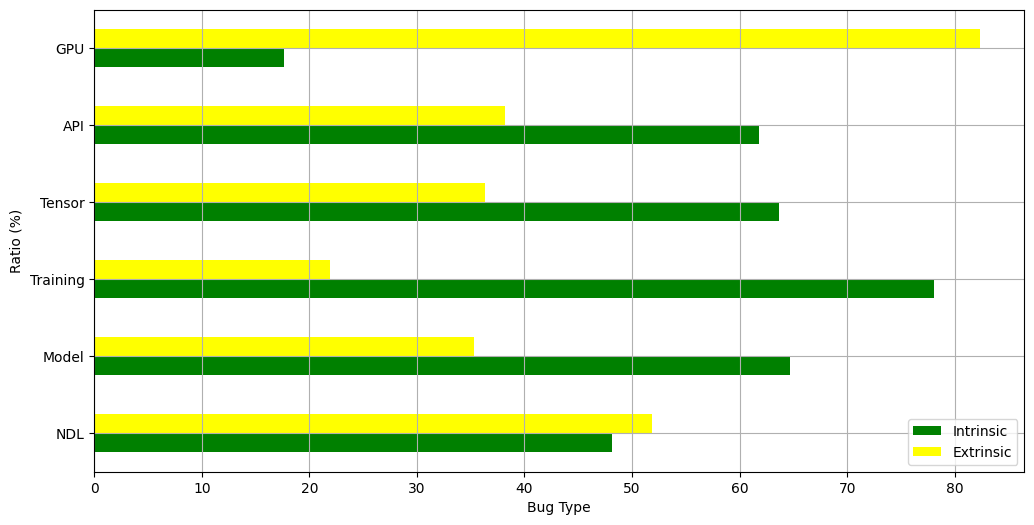

In [37]:
plotdata = pd.DataFrame({
    "Intrinsic":[NDL_Intrinsic[0]*100, Model_Intrinsic[0]*100, Training_Intrinsic[0]*100, Tensor_Intrinsic[0]*100, API_Intrinsic[0]*100, GPU_Intrinsic[0]*100],
    "Extrinsic":[NDL_Extrinsic[0]*100, Model_Extrinsic[0]*100, Training_Extrinsic[0]*100, Tensor_Extrinsic[0]*100, API_Extrinsic[0]*100, GPU_Extrinsic[0]*100]},
    index=["NDL", "Model", "Training", "Tensor", "API", "GPU"])

plotdata.plot(kind="barh",figsize=(12, 6), color= ['green', 'yellow'])
plt.xlabel("Bug Type")
plt.ylabel("Ratio (%)")
plt.grid()
plt.show()

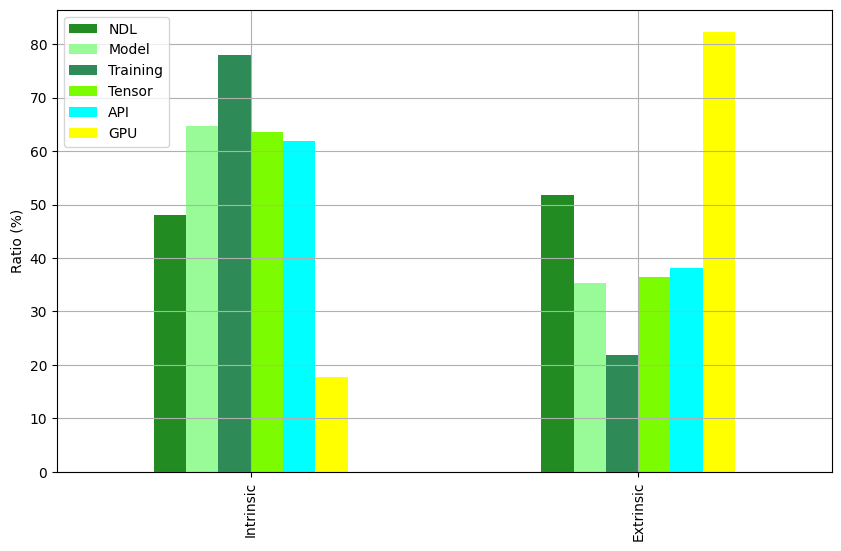

In [38]:
plotdata = pd.DataFrame({
    "NDL":[NDL_Intrinsic[0]*100, NDL_Extrinsic[0]*100],
    "Model":[Model_Intrinsic[0]*100, Model_Extrinsic[0]*100],
    "Training":[Training_Intrinsic[0]*100, Training_Extrinsic[0]*100],
    "Tensor":[Tensor_Intrinsic[0]*100, Tensor_Extrinsic[0]*100],
    "API":[API_Intrinsic[0]*100, API_Extrinsic[0]*100],
    "GPU":[GPU_Intrinsic[0]*100, GPU_Extrinsic[0]*100]},
    index=["Intrinsic", "Extrinsic"])

plotdata.plot(kind="bar",figsize=(10, 6), color= ['forestgreen', 'palegreen', 'seagreen', 'lawngreen', 'cyan', 'yellow'])
plt.ylabel("Ratio (%)")
plt.grid()
plt.show()

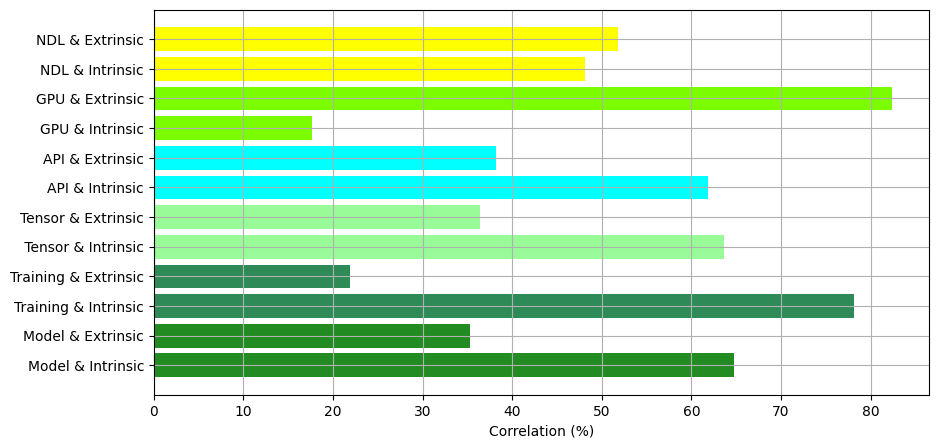

<Figure size 640x480 with 0 Axes>

In [39]:
#customization of the graph horizontal bar graph
plt.figure(figsize=(10,5))
plt.barh(Bug_Type,Ratio_Extrinsic_Intrinsic_Bug_Type,color=['forestgreen', 'forestgreen', 'seagreen', 'seagreen', 'palegreen', 'palegreen','cyan', 'cyan', 'lawngreen', 'lawngreen', 'yellow', 'yellow'])
plt.xlabel('Correlation (%)')
plt.grid()
plt.show()
#save the graph as png and download with high resolution
plt.savefig('Correlation_Extrinsic_Intrinsic_Bug_Type.png', dpi=300, bbox_inches='tight')

In [40]:
Ratio_Extrinsic_Bug_Type = [Model_Extrinsic[0], Training_Extrinsic[0], Tensor_Extrinsic[0], API_Extrinsic[0], GPU_Extrinsic[0], NDL_Extrinsic[0]]
Ratio_Extrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Bug_Type]
Bug_Type_Extrinsic = ['Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL']

In [41]:
Ratio_Intrinsic_Bug_Type = [Model_Intrinsic[0], Training_Intrinsic[0], Tensor_Intrinsic[0], API_Intrinsic[0], GPU_Intrinsic[0], NDL_Intrinsic[0]]
Ratio_Intrinsic_Bug_Type = [i*100 for i in Ratio_Intrinsic_Bug_Type]
Bug_Type_Intrinsic = ['Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL']

In [42]:
#ratio of each unique values from DL_bug_type column with extrinsic bug column
groupby_val = df2.groupby('DL_Bug_Type')['Extrinsic_Bugs'].value_counts()

In [43]:
#groupby_val_count = 18, 11, 55, 20, 12, 7, 27, 7, 0, 14, 48, 44

In [44]:
Bug_Type_Extrinsic = ['NDL Bug', 'Model', 'Training', 'Tensor & Input', 'API', 'GPU']
Ratio_Extrinsic_Bug_Type = [NDL_Extrinsic[0], Model_Extrinsic[0], Training_Extrinsic[0], Tensor_Extrinsic[0], API_Extrinsic[0], GPU_Extrinsic[0]]
Ratio_Extrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Bug_Type]
Ratio_Extrinsic_Bug_Type

[51.85185185185185,
 35.294117647058826,
 21.904761904761905,
 36.36363636363637,
 38.18181818181819,
 82.35294117647058]

In [45]:
Bug_Type_Intrinsic = ['NDL Bug', 'Model', 'Training', 'Tensor & Input', 'API', 'GPU']
Ratio_Intrinsic_Bug_Type = [NDL_Intrinsic[0], Model_Intrinsic[0], Training_Intrinsic[0], Tensor_Intrinsic[0], API_Intrinsic[0], GPU_Intrinsic[0]]
Ratio_Intrinsic_Bug_Type = [i*100 for i in Ratio_Intrinsic_Bug_Type]
Ratio_Intrinsic_Bug_Type

[48.148148148148145,
 64.70588235294117,
 78.0952380952381,
 63.63636363636363,
 61.81818181818181,
 17.647058823529413]

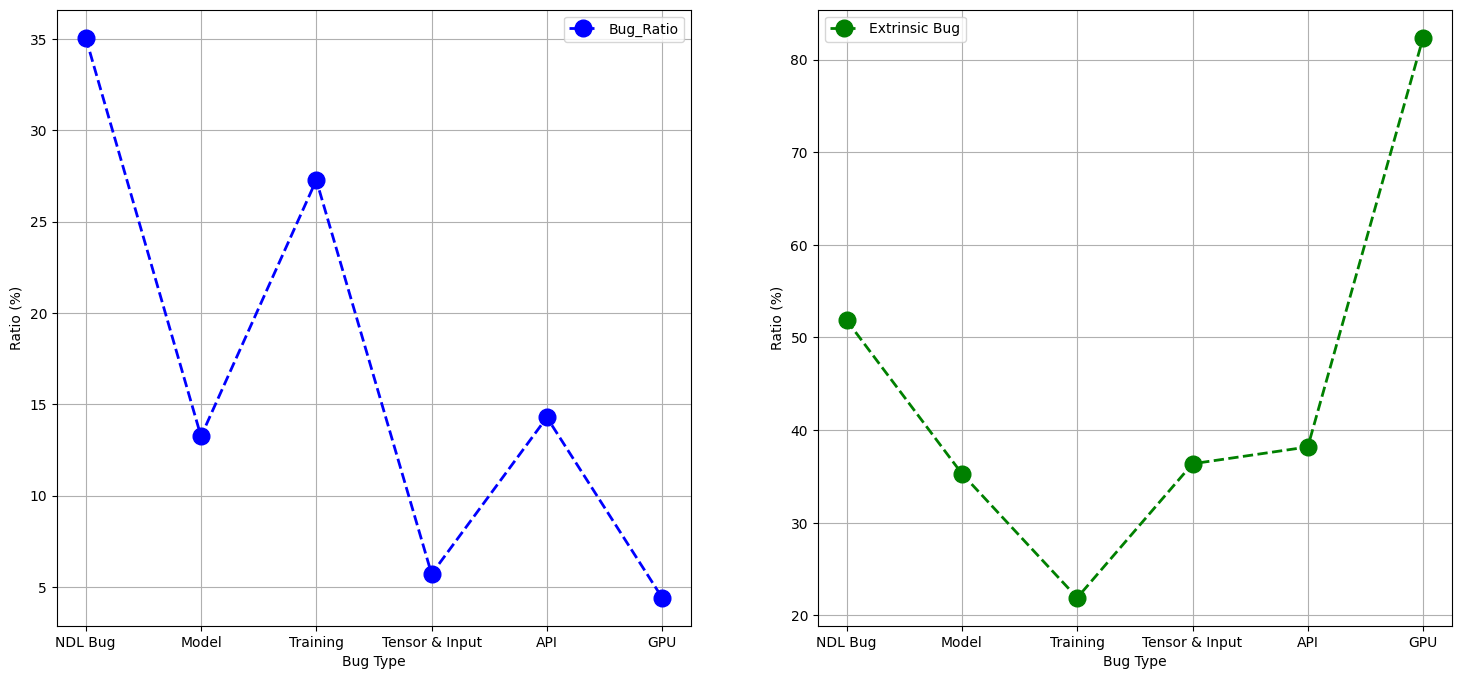

<Figure size 640x480 with 0 Axes>

In [46]:
#visualize using line graph with customization of the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.plot(list_dl_bug_type_label,list_dl_bug_type_ratio,color='blue',marker='o',linestyle='dashed',linewidth=2,markersize=12)
ax1.legend(['Bug_Ratio'])
ax1.set_xlabel('Bug Type')
ax1.set_ylabel('Ratio (%)')
ax1.grid()

ax2.plot(Bug_Type_Extrinsic,Ratio_Extrinsic_Bug_Type, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax2.legend(['Extrinsic Bug'])
ax2.set_xlabel('Bug Type')
ax2.set_ylabel('Ratio (%)')
ax2.grid()

plt.show()
#save the graph as png and download with high resolution
plt.savefig('Bug_Ratio_Extrinsic_Bug_Type.png', dpi=300, bbox_inches='tight')


In [47]:
#print one row where DL Bug is 1.0 and Extrinsic Bug is 1.0
DL_Extrinsic = df2.loc[(df2['DL_Bugs'] == 1.0) & (df2['Extrinsic_Bugs'] == 1.0)]
#print one row where DL Bug is 1.0 and Extrinsic Bug is 0.0
DL_Intrinsic = df2.loc[(df2['DL_Bugs'] == 1.0) & (df2['Extrinsic_Bugs'] == 0.0)]
#print row where DL Bug is 0.0 and Extrinsic Bug is 1.0
NDL_Extrinsic = df2.loc[(df2['DL_Bugs'] == 0.0) & (df2['Extrinsic_Bugs'] == 1.0)]
#print row where DL Bug is 0.0 and Extrinsic Bug is 0.0
NDL_Intrinsic = df2.loc[(df2['DL_Bugs'] == 0.0) & (df2['Extrinsic_Bugs'] == 0.0)]

In [48]:
#print rows where dl bug type value is 1.0
Model_Bug= df2.loc[(df2['DL_Bug_Type'] == 1.0)]

#print rows where dl bug type value is 2.0
Training_Bug= df2.loc[(df2['DL_Bug_Type'] == 2.0)]

#print rows where dl bug type value is 3.0
Tensor_Bug = df2.loc[(df2['DL_Bug_Type'] == 3.0)]

#print rows where dl bug type value is 4.0
API_Bug = df2.loc[(df2['DL_Bug_Type'] == 4.0)]

#print rows where dl bug type value is 5.0
GPU_Bug = df2.loc[(df2['DL_Bug_Type'] == 5.0)]

#print rows where dl bug type value is 420.0
NDL_Bug = df2.loc[(df2['DL_Bug_Type'] == 420.0)]

#print the shape of all these dataframes

print(Model_Bug.shape)
print(Training_Bug.shape)
print(Tensor_Bug.shape)
print(API_Bug.shape)
print(GPU_Bug.shape)
print(NDL_Bug.shape)

(51, 9)
(105, 9)
(22, 9)
(55, 9)
(17, 9)
(135, 9)


## Result from BugLocator, BLUiR & BLIA

In [49]:
#read the csv file of results from buglocator and bluir
df3 = pd.read_csv("C:/Users/sigma/Desktop/results_rq1_buglocator_Bluir.csv")
df3

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
0,albumentations-team+albumentations,0.5.1,760,buglocator,1,4,0.250000,0.250000
1,albumentations-team+albumentations,0.5.1,760,bluir,1,1,1.000000,1.000000
2,albumentations-team+albumentations,v0.1.1,180,buglocator,1,5,0.200000,0.200000
3,albumentations-team+albumentations,v0.1.1,180,bluir,1,2,0.500000,0.500000
4,albumentations-team+albumentations,v0.1.1,186,buglocator,3,1,1.000000,0.493590
...,...,...,...,...,...,...,...,...
3581,tensorpack+tensorpack,v0.1,96,bluir,1,79,0.012658,0.012658
3582,tensorpack+tensorpack,v0.9.1,1077,buglocator,4,1,1.000000,0.779412
3583,tensorpack+tensorpack,v0.9.1,1077,bluir,4,1,1.000000,0.510185
3584,tensorpack+tensorpack,v0.9.5,1252,buglocator,1,2,0.500000,0.500000


In [50]:
# only keep rows with method = buglocator from df3
df_buglocator = df3.loc[df3['Method'] == 'buglocator']
df_buglocator

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
0,albumentations-team+albumentations,0.5.1,760,buglocator,1,4,0.250000,0.250000
2,albumentations-team+albumentations,v0.1.1,180,buglocator,1,5,0.200000,0.200000
4,albumentations-team+albumentations,v0.1.1,186,buglocator,3,1,1.000000,0.493590
6,albumentations-team+albumentations,v0.1.1,207,buglocator,2,1,1.000000,1.000000
8,albumentations-team+albumentations,v0.1.1,213,buglocator,2,2,0.500000,0.375000
...,...,...,...,...,...,...,...,...
3576,tensorpack+tensorpack,v0.1,84,buglocator,1,31,0.032258,0.032258
3578,tensorpack+tensorpack,v0.1,92,buglocator,2,86,0.011628,0.016452
3580,tensorpack+tensorpack,v0.1,96,buglocator,1,13,0.076923,0.076923
3582,tensorpack+tensorpack,v0.9.1,1077,buglocator,4,1,1.000000,0.779412


In [51]:
# only keep rows with method = bluir from df3
df_bluir = df3.loc[df3['Method'] == 'bluir']
df_bluir

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
1,albumentations-team+albumentations,0.5.1,760,bluir,1,1,1.000000,1.000000
3,albumentations-team+albumentations,v0.1.1,180,bluir,1,2,0.500000,0.500000
5,albumentations-team+albumentations,v0.1.1,186,bluir,3,1,1.000000,0.490909
7,albumentations-team+albumentations,v0.1.1,207,bluir,2,18,0.055556,0.066239
9,albumentations-team+albumentations,v0.1.1,213,bluir,2,1,1.000000,1.000000
...,...,...,...,...,...,...,...,...
3577,tensorpack+tensorpack,v0.1,84,bluir,1,63,0.015873,0.015873
3579,tensorpack+tensorpack,v0.1,92,bluir,2,96,0.010417,0.013904
3581,tensorpack+tensorpack,v0.1,96,bluir,1,79,0.012658,0.012658
3583,tensorpack+tensorpack,v0.9.1,1077,bluir,4,1,1.000000,0.510185


In [52]:
#read the csv file of results from BLIA
df_BLIA = pd.read_csv("C:/Users/sigma/Desktop/results_rq1_BLIA.csv")
df_BLIA

,6,8,11,12
0,albumentations-team+albumentations,180,0.857143,0.857143
1,albumentations-team+albumentations,186,0.939138,0.495109
2,albumentations-team+albumentations,207,0.299018,0.254698
3,albumentations-team+albumentations,213,0.954046,0.945734
4,albumentations-team+albumentations,215,0.208601,0.208601
...,...,...,...,...
1788,tensorpack+tensorpack,1040,0.679570,0.574749
1789,tensorpack+tensorpack,1046,0.934671,0.934671
1790,tensorpack+tensorpack,1057,0.936602,0.936602
1791,tensorpack+tensorpack,1077,0.936703,0.797959


In [53]:
# set column names of df_BLIA
df_BLIA.columns = ['Project', 'Bug_ID', 'MRR', 'MAP']
df_BLIA

,Project,Bug_ID,MRR,MAP
0,albumentations-team+albumentations,180,0.857143,0.857143
1,albumentations-team+albumentations,186,0.939138,0.495109
2,albumentations-team+albumentations,207,0.299018,0.254698
3,albumentations-team+albumentations,213,0.954046,0.945734
4,albumentations-team+albumentations,215,0.208601,0.208601
...,...,...,...,...
1788,tensorpack+tensorpack,1040,0.679570,0.574749
1789,tensorpack+tensorpack,1046,0.934671,0.934671
1790,tensorpack+tensorpack,1057,0.936602,0.936602
1791,tensorpack+tensorpack,1077,0.936703,0.797959


In [54]:
#copy df_BLIA to df_BLIA2
df_BLIA2 = df_BLIA.copy()
df_BLIA2

,Project,Bug_ID,MRR,MAP
0,albumentations-team+albumentations,180,0.857143,0.857143
1,albumentations-team+albumentations,186,0.939138,0.495109
2,albumentations-team+albumentations,207,0.299018,0.254698
3,albumentations-team+albumentations,213,0.954046,0.945734
4,albumentations-team+albumentations,215,0.208601,0.208601
...,...,...,...,...
1788,tensorpack+tensorpack,1040,0.679570,0.574749
1789,tensorpack+tensorpack,1046,0.934671,0.934671
1790,tensorpack+tensorpack,1057,0.936602,0.936602
1791,tensorpack+tensorpack,1077,0.936703,0.797959


In [55]:
# print the unique values of the column 'Project' for df
df['Project'].unique()
 #print the count of the unique values of the column 'Project' for df
df['Project'].value_counts()

Project
apache+incubator-mxnet      148
tensorflow+tfjs              55
pytorch+fairseq              35
pytorch+ignite               20
ray-project+ray              17
fastai+fastai                16
keras-team+keras             13
asyml+texar-pytorch          13
pytorch+pytorch              11
keras-team+autokeras         10
deepset-ai+haystack          10
mozilla+deepspeech            8
tflearn+tflearn               6
flairnlp+flair                6
nvidia+digits                 5
opencv+opencv                 5
microsoft+computervision      5
nvidia+tensorrt               2
Name: count, dtype: int64

In [56]:
#copy df to df4
df_copy = df.copy()
df_copy

,Project,Bug_ID,Summary,Commit ID,DL_Bugs,DL_Bug_Type,Non_DL_Bugs,Extrinsic_Bugs,Intrinsic_Bugs
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420.0,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420.0,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,5.0,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,4.0,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,420.0,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,420.0,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,4.0,No,No,Yes


In [57]:
# find out which bug id is in both df_copy and df3 by matching with the value of both 'Bug_ID' and 'Project'
df_common = df_copy[df_copy['Bug_ID'].isin(df3['Bug_ID']) & df_copy['Project'].isin(df3['Project'])]
df_common

,Project,Bug_ID,Summary,Commit ID,DL_Bugs,DL_Bug_Type,Non_DL_Bugs,Extrinsic_Bugs,Intrinsic_Bugs
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420.0,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420.0,Yes,No,Yes
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420.0,Yes,No,Yes
5,apache+incubator-mxnet,10520,MXNet operator profile aggregate counter issue,3f8fd005402968e77ecb05eb3c73eb1c5e35b332,Yes,1.0,No,No,Yes
...,...,...,...,...,...,...,...,...,...
380,deepset-ai+haystack,164,Error in File Upload API,587b2fe74937db9d7842c4e776dce7b480bfee3d,Yes,4.0,No,No,Yes
381,deepset-ai+haystack,168,FARMReader return multiple is_impossible answe...,5852cbd306039d0f24b528583e587d46144d09bd,No,420.0,Yes,No,Yes
382,deepset-ai+haystack,223,Version mismatch at installation & encoding issue,955e6f7b3accd4222f2deaa044939793464f703a,No,420.0,Yes,Yes,No
383,deepset-ai+haystack,238,Tutorial2- Finetuning on exported feedback dat...,1289cc6fbb35bc49bf48b95523954735eedd34a9,Yes,4.0,No,No,Yes


In [58]:
#get the MRR and MAP df_common bug id from df3
df_common_MRR_MAP = df3[df3['Bug_ID'].isin(df_common['Bug_ID']) & df3['Project'].isin(df_common['Project'])]
df_common_MRR_MAP

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
100,apache+incubator-mxnet,1.1.0,10011,buglocator,6,6,0.166667,0.037784
101,apache+incubator-mxnet,1.1.0,10011,bluir,6,48,0.020833,0.019890
102,apache+incubator-mxnet,1.1.0,10026,buglocator,1,7,0.142857,0.142857
103,apache+incubator-mxnet,1.1.0,10026,bluir,1,10,0.100000,0.100000
104,apache+incubator-mxnet,1.1.0,10146,buglocator,2,1,1.000000,0.700000
...,...,...,...,...,...,...,...,...
3487,tensorflow+tfjs,tfjs-v2.0.1,3611,bluir,1,6,0.166667,0.166667
3488,tensorflow+tfjs,tfjs-v2.1.0,3786,buglocator,1,6,0.166667,0.166667
3489,tensorflow+tfjs,tfjs-v2.1.0,3786,bluir,1,7,0.142857,0.142857
3490,tensorflow+tfjs,tfjs-v2.6.0,4125,buglocator,1,8,0.125000,0.125000


In [59]:
#replace the value of the column 'Project' for 'apache+incubator-mxnet' = 'mxnet', ''pytorch+fairseq' = 'pytorch', 'pytorch+ignite' = 'pytorch', 'pytorch+pytorch' = 'pytorch', 'tflearn+tflearn' = 'tensorflow', 'tensorflow+tfjs' = 'tensorflow', 'keras-team+keras' ='keras', 'keras-team+autokeras' ='keras'
df['Project'] = df['Project'].replace(['apache+incubator-mxnet', 'pytorch+fairseq', 'pytorch+ignite', 'pytorch+pytorch', 'tflearn+tflearn', 'tensorflow+tfjs', 'keras-team+keras', 'keras-team+autokeras', 'fastai+fastai', 'opencv+opencv', 'mozilla+deepspeech'], ['mxnet', 'pytorch', 'pytorch', 'pytorch', 'tensorflow', 'tensorflow', 'keras', 'keras', 'opencv', 'opencv', 'opencv'])

In [60]:
# only keep the rows which has project value = 'mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'
df = df[df['Project'].isin(['mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'])]
# print the unique values of the column 'Project' for df
df['Project'].unique()
    #print the count of the unique values of the column 'Project' for df
df['Project'].value_counts()

Project
mxnet         148
pytorch        66
tensorflow     61
opencv         29
keras          23
Name: count, dtype: int64

In [61]:
#get the rows for method == buglocator and save it as a new dataframe
df_common_MRR_MAP_buglocator = df_common_MRR_MAP.loc[df_common_MRR_MAP['Method'] == 'buglocator']
df_common_MRR_MAP_buglocator

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
100,apache+incubator-mxnet,1.1.0,10011,buglocator,6,6,0.166667,0.037784
102,apache+incubator-mxnet,1.1.0,10026,buglocator,1,7,0.142857,0.142857
104,apache+incubator-mxnet,1.1.0,10146,buglocator,2,1,1.000000,0.700000
106,apache+incubator-mxnet,1.1.0,10224,buglocator,1,1,1.000000,1.000000
108,apache+incubator-mxnet,1.1.0,10431,buglocator,1,6,0.166667,0.166667
...,...,...,...,...,...,...,...,...
2858,ray-project+ray,ray-1.0.1.post1,12195,buglocator,1,3,0.333333,0.333333
3484,tensorflow+tfjs,tfjs-v1.2.8,1898,buglocator,2,18,0.055556,0.077778
3486,tensorflow+tfjs,tfjs-v2.0.1,3611,buglocator,1,8,0.125000,0.125000
3488,tensorflow+tfjs,tfjs-v2.1.0,3786,buglocator,1,6,0.166667,0.166667


In [62]:
#replace the value of the column 'Project' for 'apache+incubator-mxnet' = 'mxnet', ''pytorch+fairseq' = 'pytorch', 'pytorch+ignite' = 'pytorch', 'pytorch+pytorch' = 'pytorch', 'tflearn+tflearn' = 'tensorflow', 'tensorflow+tfjs' = 'tensorflow', 'keras-team+keras' ='keras', 'keras-team+autokeras' ='keras'
df_common_MRR_MAP_buglocator['Project'] = df_common_MRR_MAP_buglocator['Project'].replace(['apache+incubator-mxnet', 'pytorch+fairseq', 'pytorch+ignite', 'pytorch+pytorch', 'tflearn+tflearn', 'tensorflow+tfjs', 'keras-team+keras', 'keras-team+autokeras', 'fastai+fastai', 'opencv+opencv', 'mozilla+deepspeech'], ['mxnet', 'pytorch', 'pytorch', 'pytorch', 'tensorflow', 'tensorflow', 'keras', 'keras', 'opencv', 'opencv', 'opencv'])

C:\Users\sigma\AppData\Local\Temp\ipykernel_8644\334307501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common_MRR_MAP_buglocator['Project'] = df_common_MRR_MAP_buglocator['Project'].replace(['apache+incubator-mxnet', 'pytorch+fairseq', 'pytorch+ignite', 'pytorch+pytorch', 'tflearn+tflearn', 'tensorflow+tfjs', 'keras-team+keras', 'keras-team+autokeras', 'fastai+fastai', 'opencv+opencv', 'mozilla+deepspeech'], ['mxnet', 'pytorch', 'pytorch', 'pytorch', 'tensorflow', 'tensorflow', 'keras', 'keras', 'opencv', 'opencv', 'opencv'])


In [63]:
# only keep the rows which has project value = 'mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'
df_common_MRR_MAP_buglocator = df_common_MRR_MAP_buglocator[df_common_MRR_MAP_buglocator['Project'].isin(['mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'])]
df_common_MRR_MAP_buglocator

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
100,mxnet,1.1.0,10011,buglocator,6,6,0.166667,0.037784
102,mxnet,1.1.0,10026,buglocator,1,7,0.142857,0.142857
104,mxnet,1.1.0,10146,buglocator,2,1,1.000000,0.700000
106,mxnet,1.1.0,10224,buglocator,1,1,1.000000,1.000000
108,mxnet,1.1.0,10431,buglocator,1,6,0.166667,0.166667
...,...,...,...,...,...,...,...,...
1988,pytorch,v0.4rc.0.post1,1133,buglocator,5,1,1.000000,0.589394
3484,tensorflow,tfjs-v1.2.8,1898,buglocator,2,18,0.055556,0.077778
3486,tensorflow,tfjs-v2.0.1,3611,buglocator,1,8,0.125000,0.125000
3488,tensorflow,tfjs-v2.1.0,3786,buglocator,1,6,0.166667,0.166667


In [64]:
#get the rwos for method == bluir and save it as a new dataframe
df_common_MRR_MAP_bluir = df_common_MRR_MAP.loc[df_common_MRR_MAP['Method'] == 'bluir']
df_common_MRR_MAP_bluir

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
101,apache+incubator-mxnet,1.1.0,10011,bluir,6,48,0.020833,0.019890
103,apache+incubator-mxnet,1.1.0,10026,bluir,1,10,0.100000,0.100000
105,apache+incubator-mxnet,1.1.0,10146,bluir,2,4,0.250000,0.267857
107,apache+incubator-mxnet,1.1.0,10224,bluir,1,115,0.008696,0.008696
109,apache+incubator-mxnet,1.1.0,10431,bluir,1,3,0.333333,0.333333
...,...,...,...,...,...,...,...,...
2859,ray-project+ray,ray-1.0.1.post1,12195,bluir,1,93,0.010753,0.010753
3485,tensorflow+tfjs,tfjs-v1.2.8,1898,bluir,2,11,0.090909,0.116883
3487,tensorflow+tfjs,tfjs-v2.0.1,3611,bluir,1,6,0.166667,0.166667
3489,tensorflow+tfjs,tfjs-v2.1.0,3786,bluir,1,7,0.142857,0.142857


In [65]:
#replace the value of the column 'Project' for 'apache+incubator-mxnet' = 'mxnet', ''pytorch+fairseq' = 'pytorch', 'pytorch+ignite' = 'pytorch', 'pytorch+pytorch' = 'pytorch', 'tflearn+tflearn' = 'tensorflow', 'tensorflow+tfjs' = 'tensorflow', 'keras-team+keras' ='keras', 'keras-team+autokeras' ='keras'
df_common_MRR_MAP_bluir['Project'] = df_common_MRR_MAP_bluir['Project'].replace(['apache+incubator-mxnet', 'pytorch+fairseq', 'pytorch+ignite', 'pytorch+pytorch', 'tflearn+tflearn', 'tensorflow+tfjs', 'keras-team+keras', 'keras-team+autokeras', 'fastai+fastai', 'opencv+opencv', 'mozilla+deepspeech'], ['mxnet', 'pytorch', 'pytorch', 'pytorch', 'tensorflow', 'tensorflow', 'keras', 'keras', 'opencv', 'opencv', 'opencv'])

C:\Users\sigma\AppData\Local\Temp\ipykernel_8644\2660945202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common_MRR_MAP_bluir['Project'] = df_common_MRR_MAP_bluir['Project'].replace(['apache+incubator-mxnet', 'pytorch+fairseq', 'pytorch+ignite', 'pytorch+pytorch', 'tflearn+tflearn', 'tensorflow+tfjs', 'keras-team+keras', 'keras-team+autokeras', 'fastai+fastai', 'opencv+opencv', 'mozilla+deepspeech'], ['mxnet', 'pytorch', 'pytorch', 'pytorch', 'tensorflow', 'tensorflow', 'keras', 'keras', 'opencv', 'opencv', 'opencv'])


In [66]:
# only keep the rows which has project value = 'mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'
df_common_MRR_MAP_bluir = df_common_MRR_MAP_bluir[df_common_MRR_MAP_bluir['Project'].isin(['mxnet', 'pytorch', 'tensorflow', 'keras', 'opencv'])]
df_common_MRR_MAP_bluir

,Project,Version,Bug_ID,Method,GTF,Top_Rank,MRR,MAP
101,mxnet,1.1.0,10011,bluir,6,48,0.020833,0.019890
103,mxnet,1.1.0,10026,bluir,1,10,0.100000,0.100000
105,mxnet,1.1.0,10146,bluir,2,4,0.250000,0.267857
107,mxnet,1.1.0,10224,bluir,1,115,0.008696,0.008696
109,mxnet,1.1.0,10431,bluir,1,3,0.333333,0.333333
...,...,...,...,...,...,...,...,...
1989,pytorch,v0.4rc.0.post1,1133,bluir,5,1,1.000000,0.548756
3485,tensorflow,tfjs-v1.2.8,1898,bluir,2,11,0.090909,0.116883
3487,tensorflow,tfjs-v2.0.1,3611,bluir,1,6,0.166667,0.166667
3489,tensorflow,tfjs-v2.1.0,3786,bluir,1,7,0.142857,0.142857


In [67]:
# #Find out the common bug id with project name for BLIA
# df_common_BLIA = df_BLIA[df_BLIA['Bug_ID'].isin(df_common['Bug_ID']) & df_BLIA['Project'].isin(df_common['Project'])]
# df_common_BLIA

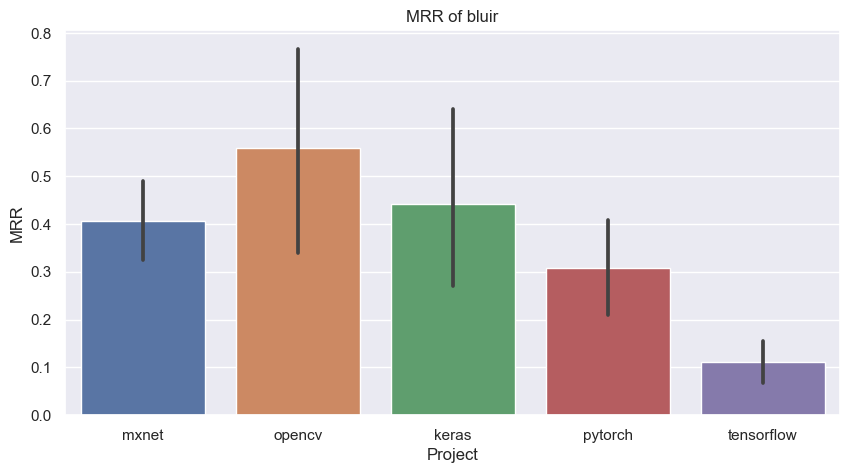

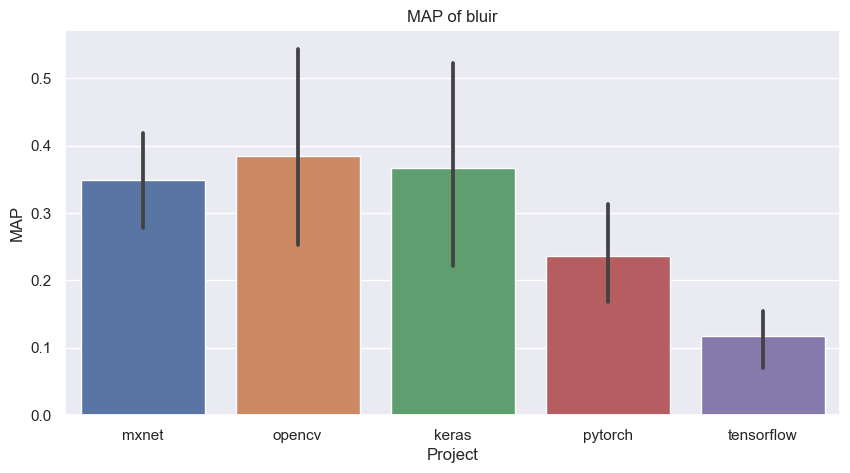

In [68]:
# merge both visualizations in one graph

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Project", y="MRR", data=df_common_MRR_MAP_bluir)
plt.title('MRR of bluir')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Project", y="MAP", data=df_common_MRR_MAP_bluir)
plt.title('MAP of bluir')
plt.show()

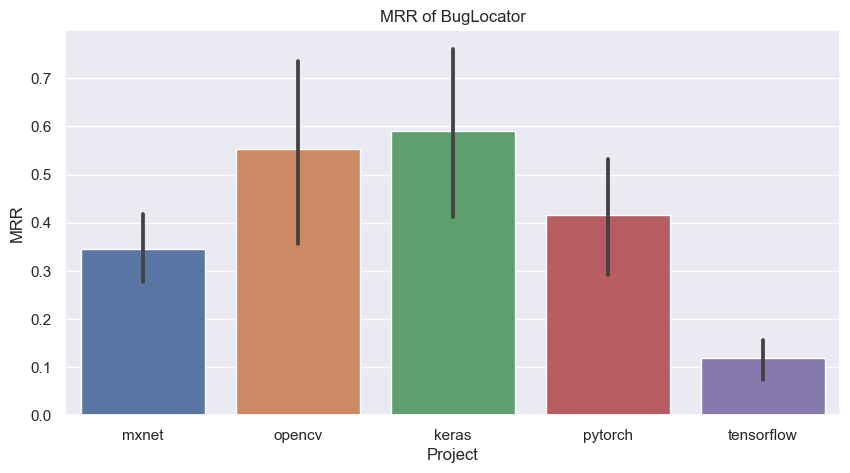

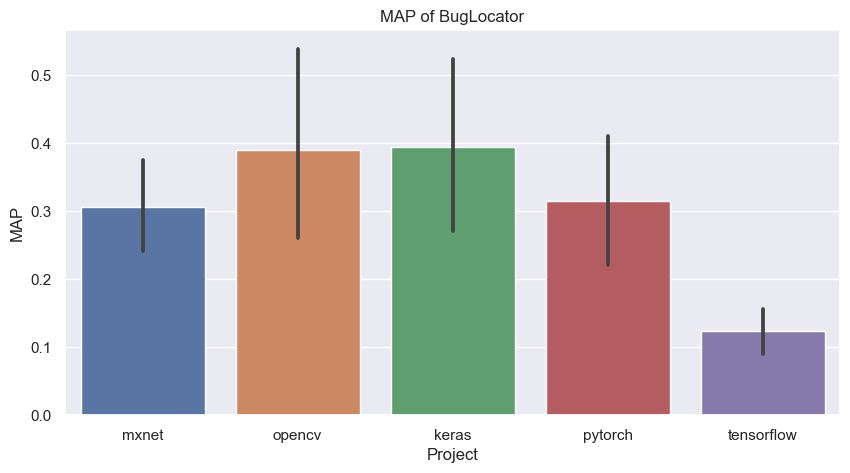

In [69]:
# merge both visualizations in one graph for df_common_MRR_MAP_buglocator

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Project", y="MRR", data=df_common_MRR_MAP_buglocator)
plt.title('MRR of BugLocator')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Project", y="MAP", data=df_common_MRR_MAP_buglocator)
plt.title('MAP of BugLocator')
plt.show()

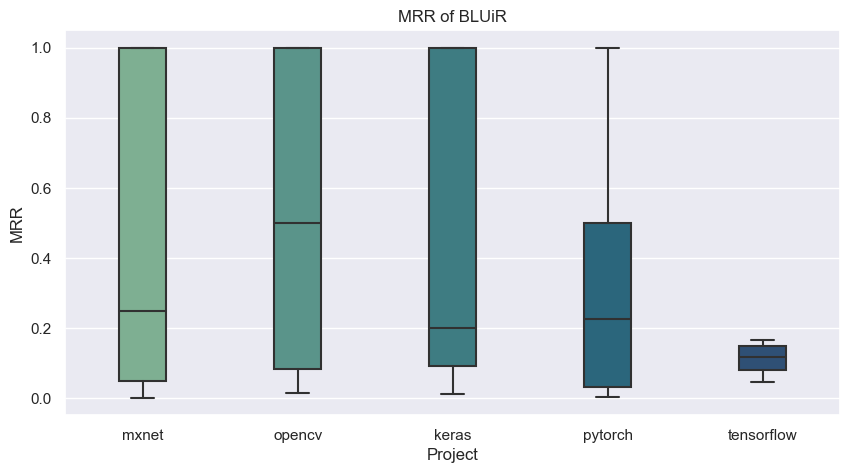

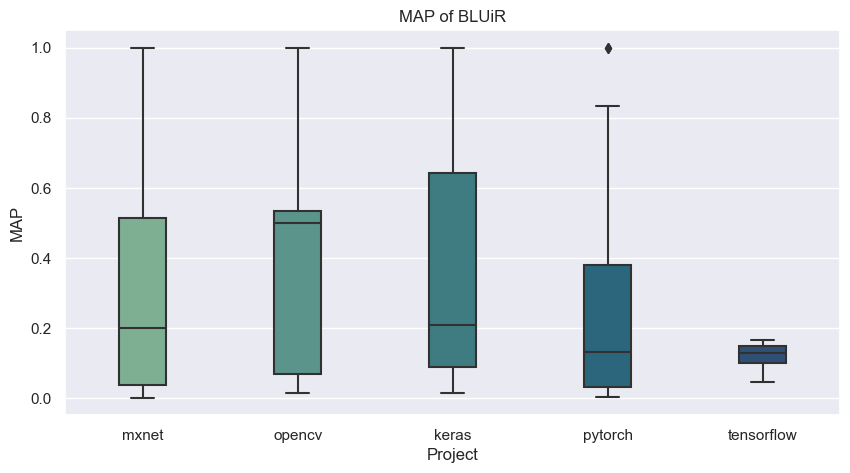

In [70]:
# use boxplot to visualize the distribution of the values of the column 'MRR' for df_common_MRR_MAP_bluir

import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("crest", as_cmap=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Project", y="MRR", data=df_common_MRR_MAP_bluir,  palette="crest", width=0.3)
plt.title('MRR of BLUiR')
plt.show()

# use boxplot to visualize the distribution of the values of the column 'MAP' for df_common_MRR_MAP_bluir

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Project", y="MAP", data=df_common_MRR_MAP_bluir,  palette="crest", width=0.3)
plt.title('MAP of BLUiR')
plt.show()



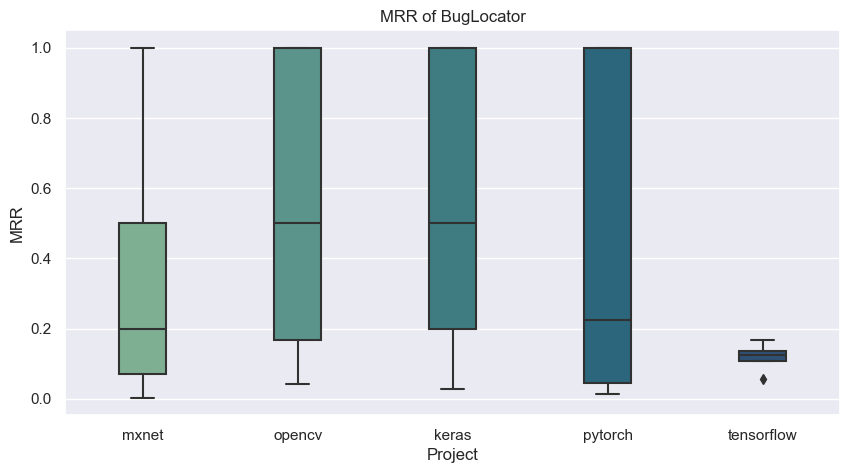

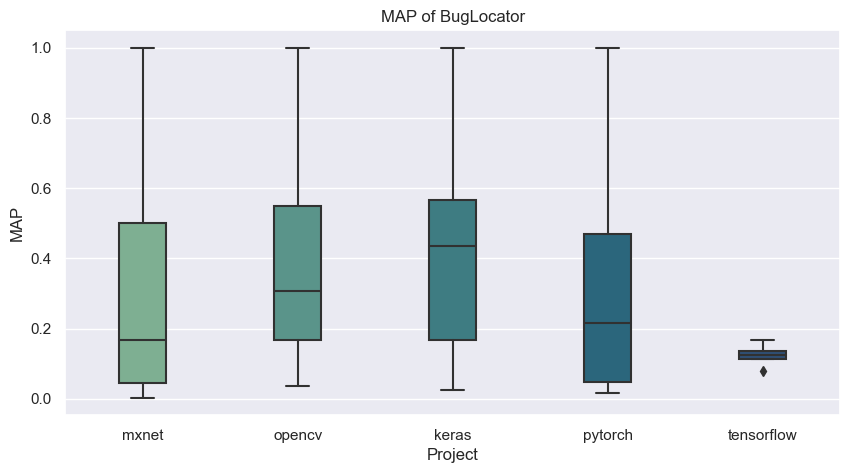

In [71]:
# use boxplot to visualize the distribution of the values of the column 'MRR' for df_common_MRR_MAP_buglocator

import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("crest", as_cmap=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Project", y="MRR", data=df_common_MRR_MAP_buglocator, palette="crest", width=0.3)
plt.title('MRR of BugLocator')
plt.show()

# use boxplot to visualize the distribution of the values of the column 'MAP' for df_common_MRR_MAP_buglocator

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Project", y="MAP", data=df_common_MRR_MAP_buglocator, palette="crest", width=0.3)
plt.title('MAP of BugLocator')
plt.show()



# Extended evaluation for subset of result from manual analysis

### Extrinsic & Intrinsic for DL and NDL - BugLocator

In [73]:
# find out which bug id is in both DL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_extrinsic_result = df_buglocator[df_buglocator['Bug_ID'].isin(DL_Extrinsic['Bug_ID']) & df_buglocator['Project'].isin(DL_Extrinsic['Project'])]
# find out which bug id is in both DL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_intrinsic_result = df_buglocator[df_buglocator['Bug_ID'].isin(DL_Intrinsic['Bug_ID']) & df_buglocator['Project'].isin(DL_Intrinsic['Project'])]
# find out which bug id is in both NDL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_extrinsic_result = df_buglocator[df_buglocator['Bug_ID'].isin(NDL_Extrinsic['Bug_ID']) & df_buglocator['Project'].isin(NDL_Extrinsic['Project'])]
# find out which bug id is in both NDL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_intrinsic_result = df_buglocator[df_buglocator['Bug_ID'].isin(NDL_Intrinsic['Bug_ID']) & df_buglocator['Project'].isin(NDL_Intrinsic['Project'])]
# print the row numbers of df_common_ndl_intrinsic_result, df_common_ndl_extrinsic_result, df_common_dl_intrinsic_result, df_common_dl_extrinsic_result
print(df_common_ndl_intrinsic_result.shape)
print(df_common_ndl_extrinsic_result.shape)
print(df_common_dl_intrinsic_result.shape)
print(df_common_dl_extrinsic_result.shape)

(37, 8)
(37, 8)
(104, 8)
(53, 8)


In [74]:
# select only 30 bug id from df_common_ndl_intrinsic_result
df_common_ndl_intrinsic_result_30 = df_common_ndl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_ndl_extrinsic_result
df_common_ndl_extrinsic_result_30 = df_common_ndl_extrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_intrinsic_result
df_common_dl_intrinsic_result_30 = df_common_dl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_extrinsic_result
df_common_dl_extrinsic_result_30 = df_common_dl_extrinsic_result.sample(n=30, random_state=1)

In [75]:
# calculate the average of MAP from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MAP_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MAP'].mean()
MAP_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MAP'].mean()
MAP_DL_Intrinsic = df_common_dl_intrinsic_result_30['MAP'].mean()
MAP_DL_Extrinsic = df_common_dl_extrinsic_result_30['MAP'].mean()

print(MAP_NDL_Intrinsic)
print(MAP_NDL_Extrinsic)
print(MAP_DL_Intrinsic)
print(MAP_DL_Extrinsic)
# calculate the average of MRR from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MRR_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MRR'].mean()
MRR_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MRR'].mean()
MRR_DL_Intrinsic = df_common_dl_intrinsic_result_30['MRR'].mean()
MRR_DL_Extrinsic = df_common_dl_extrinsic_result_30['MRR'].mean()

print(MRR_NDL_Intrinsic)
print(MRR_NDL_Extrinsic)
print(MRR_DL_Intrinsic)
print(MRR_DL_Extrinsic)

MAP_AVG = [MAP_NDL_Intrinsic, MAP_NDL_Extrinsic, MAP_DL_Intrinsic, MAP_DL_Extrinsic]
MRR_AVG = [MRR_NDL_Intrinsic, MRR_NDL_Extrinsic, MRR_DL_Intrinsic, MRR_DL_Extrinsic]
# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]

0.4045788384666667
0.37538188969999997
0.3598364361666667
0.2869990038333334
0.4760689085333334
0.4095192857666667
0.4887298420333333
0.3706075213666667


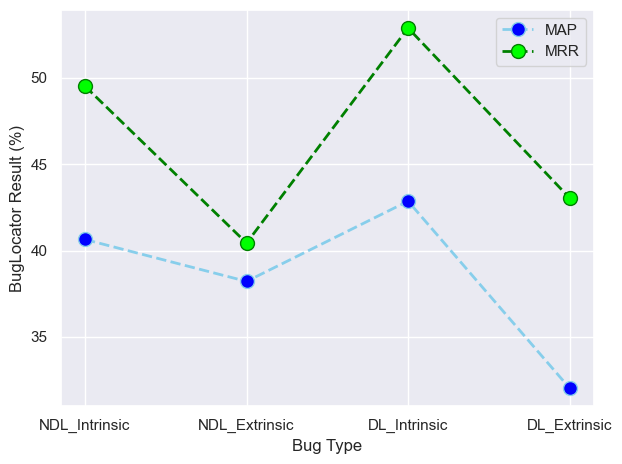

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 4
MAP_AVG = (MAP_NDL_Intrinsic*100, MAP_NDL_Extrinsic*100, MAP_DL_Intrinsic*100, MAP_DL_Extrinsic*100)
MRR_AVG = (MRR_NDL_Intrinsic*100, MRR_NDL_Extrinsic*100, MRR_DL_Intrinsic*100, MRR_DL_Extrinsic*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BugLocator Result (%)')

plt.xticks(index, ('NDL_Intrinsic', 'NDL_Extrinsic', 'DL_Intrinsic', 'DL_Extrinsic'))

ax.legend()

plt.tight_layout()
plt.show()



### Extrinsic & Intrinsic result from BLUiR

In [77]:
# find out which bug id is in both DL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_extrinsic_result = df_bluir[df_bluir['Bug_ID'].isin(DL_Extrinsic['Bug_ID']) & df_bluir['Project'].isin(DL_Extrinsic['Project'])]
# find out which bug id is in both DL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_intrinsic_result = df_bluir[df_bluir['Bug_ID'].isin(DL_Intrinsic['Bug_ID']) & df_bluir['Project'].isin(DL_Intrinsic['Project'])]
# find out which bug id is in both NDL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_extrinsic_result = df_bluir[df_bluir['Bug_ID'].isin(NDL_Extrinsic['Bug_ID']) & df_bluir['Project'].isin(NDL_Extrinsic['Project'])]
# find out which bug id is in both NDL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_intrinsic_result = df_bluir[df_bluir['Bug_ID'].isin(NDL_Intrinsic['Bug_ID']) & df_bluir['Project'].isin(NDL_Intrinsic['Project'])]
# print the row numbers of df_common_ndl_intrinsic_result, df_common_ndl_extrinsic_result, df_common_dl_intrinsic_result, df_common_dl_extrinsic_result
print(df_common_ndl_intrinsic_result.shape)
print(df_common_ndl_extrinsic_result.shape)
print(df_common_dl_intrinsic_result.shape)
print(df_common_dl_extrinsic_result.shape)

(37, 8)
(37, 8)
(104, 8)
(53, 8)


In [78]:
# select only 30 bug id from df_common_ndl_intrinsic_result
df_common_ndl_intrinsic_result_30 = df_common_ndl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_ndl_extrinsic_result
df_common_ndl_extrinsic_result_30 = df_common_ndl_extrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_intrinsic_result
df_common_dl_intrinsic_result_30 = df_common_dl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_extrinsic_result
df_common_dl_extrinsic_result_30 = df_common_dl_extrinsic_result.sample(n=30, random_state=1)

In [79]:
# calculate the average of MAP from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MAP_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MAP'].mean()
MAP_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MAP'].mean()
MAP_DL_Intrinsic = df_common_dl_intrinsic_result_30['MAP'].mean()
MAP_DL_Extrinsic = df_common_dl_extrinsic_result_30['MAP'].mean()

print(MAP_NDL_Intrinsic)
print(MAP_NDL_Extrinsic)
print(MAP_DL_Intrinsic)
print(MAP_DL_Extrinsic)
# calculate the average of MRR from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MRR_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MRR'].mean()
MRR_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MRR'].mean()
MRR_DL_Intrinsic = df_common_dl_intrinsic_result_30['MRR'].mean()
MRR_DL_Extrinsic = df_common_dl_extrinsic_result_30['MRR'].mean()

print(MRR_NDL_Intrinsic)
print(MRR_NDL_Extrinsic)
print(MRR_DL_Intrinsic)
print(MRR_DL_Extrinsic)

MAP_AVG = [MAP_NDL_Intrinsic, MAP_NDL_Extrinsic, MAP_DL_Intrinsic, MAP_DL_Extrinsic]
MRR_AVG = [MRR_NDL_Intrinsic, MRR_NDL_Extrinsic, MRR_DL_Intrinsic, MRR_DL_Extrinsic]
# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]

0.29612840839999993
0.3006732049333333
0.36864640893333334
0.27731022310000003
0.3099060460333334
0.3635193052
0.44459117226666667
0.3094593626666667


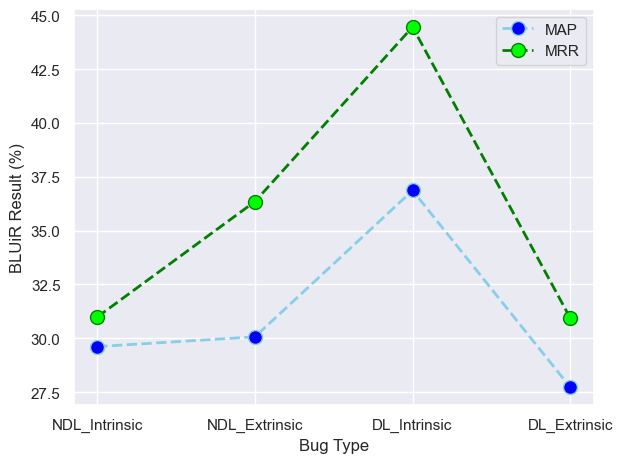

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 4
MAP_AVG = (MAP_NDL_Intrinsic*100, MAP_NDL_Extrinsic*100, MAP_DL_Intrinsic*100, MAP_DL_Extrinsic*100)
MRR_AVG = (MRR_NDL_Intrinsic*100, MRR_NDL_Extrinsic*100, MRR_DL_Intrinsic*100, MRR_DL_Extrinsic*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BLUiR Result (%)')

plt.xticks(index, ('NDL_Intrinsic', 'NDL_Extrinsic', 'DL_Intrinsic', 'DL_Extrinsic'))

ax.legend()

plt.tight_layout()
plt.show()

### Extented result analysis of Extrinsic and Intrinsic for BLIA

In [81]:
# find out which bug id is in both DL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_extrinsic_result = df_BLIA[df_BLIA['Bug_ID'].isin(DL_Extrinsic['Bug_ID']) & df_BLIA['Project'].isin(DL_Extrinsic['Project'])]
# find out which bug id is in both DL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_dl_intrinsic_result = df_BLIA[df_BLIA['Bug_ID'].isin(DL_Intrinsic['Bug_ID']) & df_BLIA['Project'].isin(DL_Intrinsic['Project'])]
# find out which bug id is in both NDL_Extrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_extrinsic_result = df_BLIA[df_BLIA['Bug_ID'].isin(NDL_Extrinsic['Bug_ID']) & df_BLIA['Project'].isin(NDL_Extrinsic['Project'])]
# find out which bug id is in both NDL_Intrinsic and df_buglocator by matching with the value of both 'Bug_ID' and 'Project' columnn
df_common_ndl_intrinsic_result = df_BLIA[df_BLIA['Bug_ID'].isin(NDL_Intrinsic['Bug_ID']) & df_BLIA['Project'].isin(NDL_Intrinsic['Project'])]
# print the row numbers of df_common_ndl_intrinsic_result, df_common_ndl_extrinsic_result, df_common_dl_intrinsic_result, df_common_dl_extrinsic_result
print(df_common_ndl_intrinsic_result.shape)
print(df_common_ndl_extrinsic_result.shape)
print(df_common_dl_intrinsic_result.shape)
print(df_common_dl_extrinsic_result.shape)

(37, 4)
(37, 4)
(104, 4)
(53, 4)


0.40636820746344143
0.3821396808016105
0.42853283115960505
0.3204408839807558
0.49496268652462755
0.4043053844900584
0.5286574927773229
0.43038762034290656


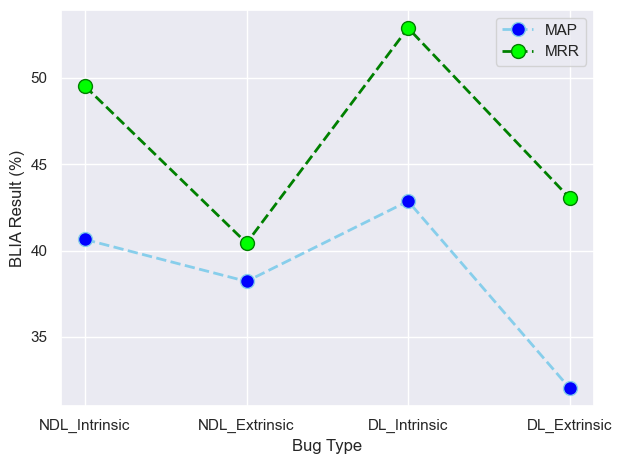

In [82]:

# select only 30 bug id from df_common_ndl_intrinsic_result
df_common_ndl_intrinsic_result_30 = df_common_ndl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_ndl_extrinsic_result
df_common_ndl_extrinsic_result_30 = df_common_ndl_extrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_intrinsic_result
df_common_dl_intrinsic_result_30 = df_common_dl_intrinsic_result.sample(n=30, random_state=1)
# select only 30 bug id from df_common_dl_extrinsic_result
df_common_dl_extrinsic_result_30 = df_common_dl_extrinsic_result.sample(n=30, random_state=1)
# calculate the average of MAP from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MAP_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MAP'].mean()
MAP_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MAP'].mean()
MAP_DL_Intrinsic = df_common_dl_intrinsic_result_30['MAP'].mean()
MAP_DL_Extrinsic = df_common_dl_extrinsic_result_30['MAP'].mean()

print(MAP_NDL_Intrinsic)
print(MAP_NDL_Extrinsic)
print(MAP_DL_Intrinsic)
print(MAP_DL_Extrinsic)
# calculate the average of MRR from df_common_ndl_intrinsic_result_30, df_common_ndl_extrinsic_result_30, df_common_dl_intrinsic_result_30, df_common_dl_extrinsic_result_30 and save it in a list

MRR_NDL_Intrinsic = df_common_ndl_intrinsic_result_30['MRR'].mean()
MRR_NDL_Extrinsic = df_common_ndl_extrinsic_result_30['MRR'].mean()
MRR_DL_Intrinsic = df_common_dl_intrinsic_result_30['MRR'].mean()
MRR_DL_Extrinsic = df_common_dl_extrinsic_result_30['MRR'].mean()

print(MRR_NDL_Intrinsic)
print(MRR_NDL_Extrinsic)
print(MRR_DL_Intrinsic)
print(MRR_DL_Extrinsic)

MAP_AVG = [MAP_NDL_Intrinsic, MAP_NDL_Extrinsic, MAP_DL_Intrinsic, MAP_DL_Extrinsic]
MRR_AVG = [MRR_NDL_Intrinsic, MRR_NDL_Extrinsic, MRR_DL_Intrinsic, MRR_DL_Extrinsic]
# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 4
MAP_AVG = (MAP_NDL_Intrinsic*100, MAP_NDL_Extrinsic*100, MAP_DL_Intrinsic*100, MAP_DL_Extrinsic*100)
MRR_AVG = (MRR_NDL_Intrinsic*100, MRR_NDL_Extrinsic*100, MRR_DL_Intrinsic*100, MRR_DL_Extrinsic*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BLIA Result (%)')

plt.xticks(index, ('NDL_Intrinsic', 'NDL_Extrinsic', 'DL_Intrinsic', 'DL_Extrinsic'))

ax.legend()

plt.tight_layout()
plt.show()

### Extended result analysis for DL_Bug_Type Buglocator

In [83]:
df_common_model_result = df_buglocator[df_buglocator['Bug_ID'].isin(Model_Bug['Bug_ID']) & df_buglocator['Project'].isin(Model_Bug['Project'])]
df_common_training_result = df_buglocator[df_buglocator['Bug_ID'].isin(Training_Bug['Bug_ID']) & df_buglocator['Project'].isin(Training_Bug['Project'])]
df_common_tensor_result = df_buglocator[df_buglocator['Bug_ID'].isin(Tensor_Bug['Bug_ID']) & df_buglocator['Project'].isin(Tensor_Bug['Project'])]
df_common_API_result = df_buglocator[df_buglocator['Bug_ID'].isin(API_Bug['Bug_ID']) & df_buglocator['Project'].isin(API_Bug['Project'])]
df_common_GPU_result = df_buglocator[df_buglocator['Bug_ID'].isin(GPU_Bug['Bug_ID']) & df_buglocator['Project'].isin(GPU_Bug['Project'])]
df_common_NDL_result = df_buglocator[df_buglocator['Bug_ID'].isin(NDL_Bug['Bug_ID']) & df_buglocator['Project'].isin(NDL_Bug['Project'])]

print(df_common_model_result.shape)
print(df_common_training_result.shape)
print(df_common_tensor_result.shape)
print(df_common_API_result.shape)
print(df_common_GPU_result.shape)
print(df_common_NDL_result.shape)

(41, 8)
(73, 8)
(9, 8)
(22, 8)
(12, 8)
(73, 8)


In [84]:
MAP_model = df_common_model_result['MAP'].mean()
MAP_training = df_common_training_result['MAP'].mean()
MAP_tensor = df_common_tensor_result['MAP'].mean()
MAP_API = df_common_API_result['MAP'].mean()
MAP_GPU = df_common_GPU_result['MAP'].mean()
MAP_NDL = df_common_NDL_result['MAP'].mean()

print(MAP_model)
print(MAP_training)
print(MAP_tensor)
print(MAP_API)
print(MAP_GPU)

MRR_model = df_common_model_result['MRR'].mean()
MRR_training = df_common_training_result['MRR'].mean()
MRR_tensor = df_common_tensor_result['MRR'].mean()
MRR_API = df_common_API_result['MRR'].mean()
MRR_GPU = df_common_GPU_result['MRR'].mean()
MRR_NDL = df_common_NDL_result['MRR'].mean()

print(MRR_model)
print(MRR_training)
print(MRR_tensor)
print(MRR_API)
print(MRR_GPU)
print(MRR_NDL)

MAP_AVG = [MAP_model, MAP_training, MAP_tensor, MAP_API, MAP_GPU, MAP_NDL]
MRR_AVG = [MRR_model, MRR_training, MRR_tensor, MRR_API, MRR_GPU, MRR_NDL]

# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]

0.3682329085609756
0.3118531366849315
0.23481026755555556
0.4459218306818181
0.18330249266666665
0.532157507292683
0.38685337590410956
0.3582771221111111
0.4775183446363636
0.2227823213333333
0.41694827654794525


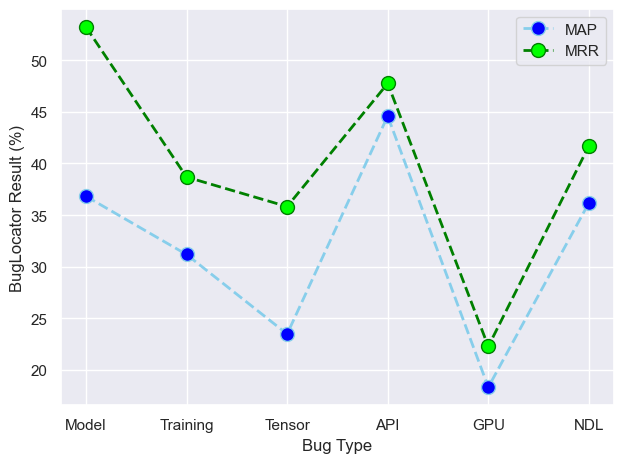

In [85]:
# data to plot
n_groups = 6
MAP_AVG = (MAP_model*100, MAP_training*100, MAP_tensor*100, MAP_API*100, MAP_GPU*100, MAP_NDL*100)
MRR_AVG = (MRR_model*100, MRR_training*100, MRR_tensor*100, MRR_API*100, MRR_GPU*100, MRR_NDL*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BugLocator Result (%)')

plt.xticks(index, ('Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL'))

ax.legend()

plt.tight_layout()
plt.show()

### Extended result analysis for DL_Bug_Type BLUiR

In [86]:
df_common_model_result = df_bluir[df_bluir['Bug_ID'].isin(Model_Bug['Bug_ID']) & df_bluir['Project'].isin(Model_Bug['Project'])]
df_common_training_result = df_bluir[df_bluir['Bug_ID'].isin(Training_Bug['Bug_ID']) & df_bluir['Project'].isin(Training_Bug['Project'])]
df_common_tensor_result = df_bluir[df_bluir['Bug_ID'].isin(Tensor_Bug['Bug_ID']) & df_bluir['Project'].isin(Tensor_Bug['Project'])]
df_common_API_result = df_bluir[df_bluir['Bug_ID'].isin(API_Bug['Bug_ID']) & df_bluir['Project'].isin(API_Bug['Project'])]
df_common_GPU_result = df_bluir[df_bluir['Bug_ID'].isin(GPU_Bug['Bug_ID']) & df_bluir['Project'].isin(GPU_Bug['Project'])]
df_common_NDL_result = df_bluir[df_bluir['Bug_ID'].isin(NDL_Bug['Bug_ID']) & df_bluir['Project'].isin(NDL_Bug['Project'])]

print(df_common_model_result.shape)
print(df_common_training_result.shape)
print(df_common_tensor_result.shape)
print(df_common_API_result.shape)
print(df_common_GPU_result.shape)
print(df_common_NDL_result.shape)

(41, 8)
(73, 8)
(9, 8)
(22, 8)
(12, 8)
(73, 8)


In [87]:
MAP_model = df_common_model_result['MAP'].mean()
MAP_training = df_common_training_result['MAP'].mean()
MAP_tensor = df_common_tensor_result['MAP'].mean()
MAP_API = df_common_API_result['MAP'].mean()
MAP_GPU = df_common_GPU_result['MAP'].mean()
MAP_NDL = df_common_NDL_result['MAP'].mean()

print(MAP_model)
print(MAP_training)
print(MAP_tensor)
print(MAP_API)
print(MAP_GPU)

MRR_model = df_common_model_result['MRR'].mean()
MRR_training = df_common_training_result['MRR'].mean()
MRR_tensor = df_common_tensor_result['MRR'].mean()
MRR_API = df_common_API_result['MRR'].mean()
MRR_GPU = df_common_GPU_result['MRR'].mean()
MRR_NDL = df_common_NDL_result['MRR'].mean()

print(MRR_model)
print(MRR_training)
print(MRR_tensor)
print(MRR_API)
print(MRR_GPU)
print(MRR_NDL)

MAP_AVG = [MAP_model, MAP_training, MAP_tensor, MAP_API, MAP_GPU, MAP_NDL]
MRR_AVG = [MRR_model, MRR_training, MRR_tensor, MRR_API, MRR_GPU, MRR_NDL]

# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]

0.2926130091219512
0.34468456760273974
0.6005108847777777
0.2582022251363636
0.26635410691666667
0.38652700782926824
0.42686413402739726
0.6822916666666666
0.289492559590909
0.4110894811666667
0.33365634752054796


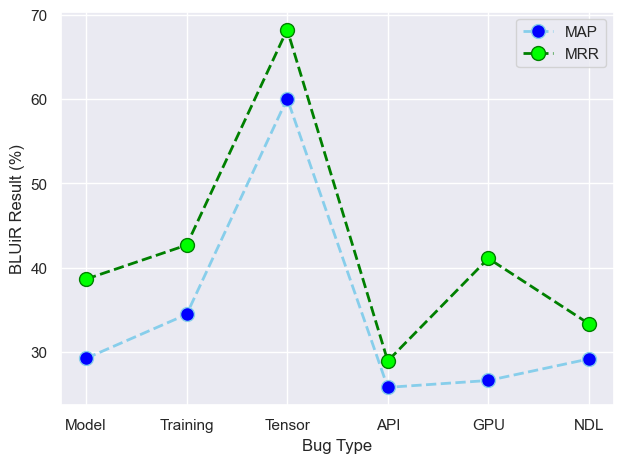

In [88]:
# data to plot
n_groups = 6
MAP_AVG = (MAP_model*100, MAP_training*100, MAP_tensor*100, MAP_API*100, MAP_GPU*100, MAP_NDL*100)
MRR_AVG = (MRR_model*100, MRR_training*100, MRR_tensor*100, MRR_API*100, MRR_GPU*100, MRR_NDL*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BLUiR Result (%)')

plt.xticks(index, ('Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL'))

ax.legend()

plt.tight_layout()
plt.show()

### Extended result analysis for DL_Bug_Type BLIA

In [89]:
### Extended result analysis for DL_Bug_Type BLUiR
df_common_model_result = df_BLIA[df_BLIA['Bug_ID'].isin(Model_Bug['Bug_ID']) & df_BLIA['Project'].isin(Model_Bug['Project'])]
df_common_training_result = df_BLIA[df_BLIA['Bug_ID'].isin(Training_Bug['Bug_ID']) & df_BLIA['Project'].isin(Training_Bug['Project'])]
df_common_tensor_result = df_BLIA[df_BLIA['Bug_ID'].isin(Tensor_Bug['Bug_ID']) & df_BLIA['Project'].isin(Tensor_Bug['Project'])]
df_common_API_result = df_BLIA[df_BLIA['Bug_ID'].isin(API_Bug['Bug_ID']) & df_BLIA['Project'].isin(API_Bug['Project'])]
df_common_GPU_result = df_BLIA[df_BLIA['Bug_ID'].isin(GPU_Bug['Bug_ID']) & df_BLIA['Project'].isin(GPU_Bug['Project'])]
df_common_NDL_result = df_BLIA[df_BLIA['Bug_ID'].isin(NDL_Bug['Bug_ID']) & df_BLIA['Project'].isin(NDL_Bug['Project'])]

print(df_common_model_result.shape)
print(df_common_training_result.shape)
print(df_common_tensor_result.shape)
print(df_common_API_result.shape)
print(df_common_GPU_result.shape)
print(df_common_NDL_result.shape)

(41, 4)
(73, 4)
(9, 4)
(22, 4)
(12, 4)
(73, 4)


In [90]:
MAP_model = df_common_model_result['MAP'].mean()
MAP_training = df_common_training_result['MAP'].mean()
MAP_tensor = df_common_tensor_result['MAP'].mean()
MAP_API = df_common_API_result['MAP'].mean()
MAP_GPU = df_common_GPU_result['MAP'].mean()
MAP_NDL = df_common_NDL_result['MAP'].mean()

print(MAP_model)
print(MAP_training)
print(MAP_tensor)
print(MAP_API)
print(MAP_GPU)

MRR_model = df_common_model_result['MRR'].mean()
MRR_training = df_common_training_result['MRR'].mean()
MRR_tensor = df_common_tensor_result['MRR'].mean()
MRR_API = df_common_API_result['MRR'].mean()
MRR_GPU = df_common_GPU_result['MRR'].mean()
MRR_NDL = df_common_NDL_result['MRR'].mean()

print(MRR_model)
print(MRR_training)
print(MRR_tensor)
print(MRR_API)
print(MRR_GPU)
print(MRR_NDL)

MAP_AVG = [MAP_model, MAP_training, MAP_tensor, MAP_API, MAP_GPU, MAP_NDL]
MRR_AVG = [MRR_model, MRR_training, MRR_tensor, MRR_API, MRR_GPU, MRR_NDL]

# multiply the MAP_AVG and MRR_AVG with 100
MAP_AVG = [i * 100 for i in MAP_AVG]
MRR_AVG = [i * 100 for i in MRR_AVG]

0.35751532684609116
0.35984482921426386
0.44788739680121675
0.39539595241396164
0.2902019787766051
0.4723963683164502
0.4198579820489057
0.552703154438832
0.4466273634117629
0.45716916109839206
0.4365970103802521


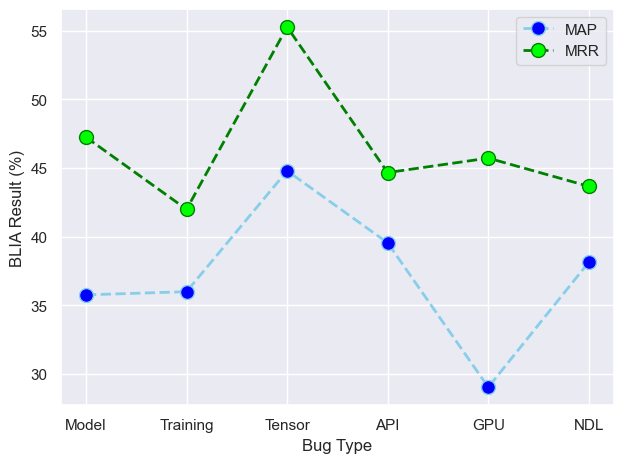

In [91]:
# data to plot
n_groups = 6
MAP_AVG = (MAP_model*100, MAP_training*100, MAP_tensor*100, MAP_API*100, MAP_GPU*100, MAP_NDL*100)
MRR_AVG = (MRR_model*100, MRR_training*100, MRR_tensor*100, MRR_API*100, MRR_GPU*100, MRR_NDL*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.plot(index, MAP_AVG, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linestyle='dashed', linewidth=2, label='MAP')
plt.plot(index, MRR_AVG, marker='o', markerfacecolor='lime', markersize=10, color='green', linestyle='dashed', linewidth=2, label='MRR')

plt.xlabel('Bug Type')
plt.ylabel('BLIA Result (%)')

plt.xticks(index, ('Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL'))

ax.legend()

plt.tight_layout()
plt.show()

### statistical significance test

In [ ]:
# merge the BLIA and BLUiR result


In [ ]:
df_BLIA